# Project - Titanic

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Loading Dataset

In [4]:
data = pd.read_csv('titanic_data.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Types of features**
- **Categorical Data** - Sex, Embarked
- **Continuous Data** - Age, Fare
- **Discrete Data** - SibSp, Parch
- **AlphaNumeric Data** - Cabin

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Numeric Value Analysis

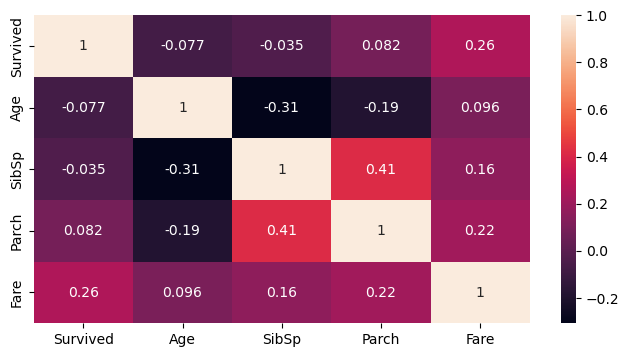

In [10]:
plt.figure(figsize= (8,4))
heatmap = sns.heatmap(data[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']].corr() , annot = True)
plt.show()

**Conclusion :**

Only Fare feature seems to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

### sibsp - Number of siblings / spouses aboard the Titanic 


In [13]:
data['SibSp'].nunique()

7

In [14]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Figure size 800x600 with 0 Axes>

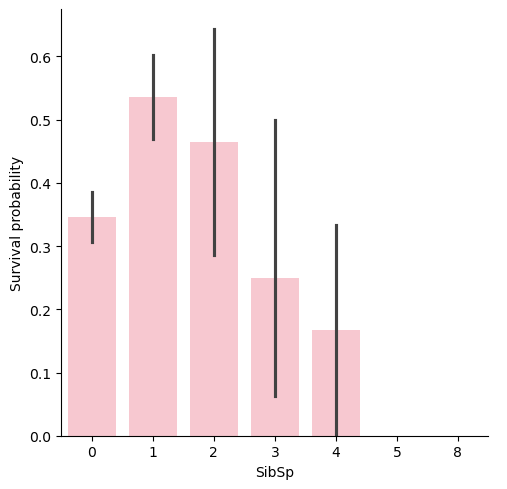

In [15]:
plt.figure(figsize = (8,6))
sns.catplot(data = data, x = 'SibSp', y = 'Survived', color = 'pink',kind = 'bar')
plt.ylabel('Survival probability')
plt.show()

The above analysis shows that the passengers travelling with more people along, i.e., having more Siblings/Spouse have less probability of survival.
But Passengers having SibSp(0) or two other persons i.e., SibSp(1,2) have more chances of survival

### Age

<Figure size 800x1000 with 0 Axes>

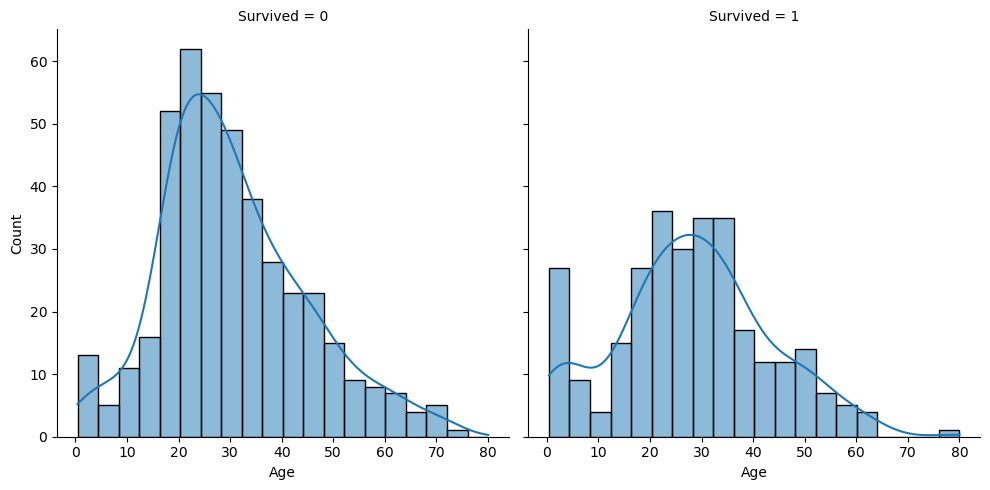

In [18]:
plt.figure(figsize=(8,10))
sns.displot(data=data, x="Age", col="Survived", kde=True) 
plt.show()

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

### Sex

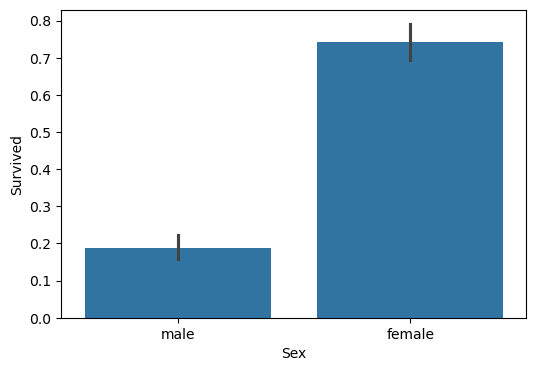

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(data=data, x='Sex' , y='Survived')
plt.show()

In [33]:
data[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival. For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation - **Women and children first**

## PClass

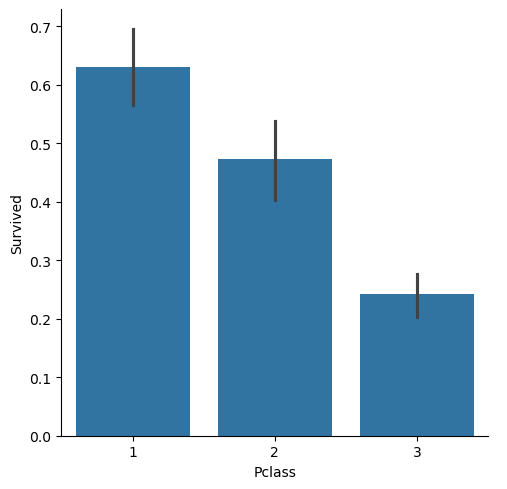

In [37]:
sns.catplot(x = "Pclass", y = "Survived", data = data, kind = "bar")
plt.show()

### Pclass vs Survived by Sex

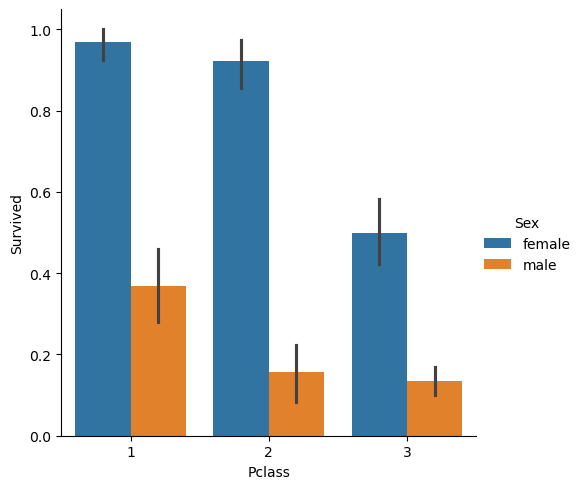

In [39]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=data, kind="bar")
plt.show()

In [41]:
data["Embarked"].isnull().sum()

2

In [42]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [43]:
data["Embarked"] = data["Embarked"].fillna("S")

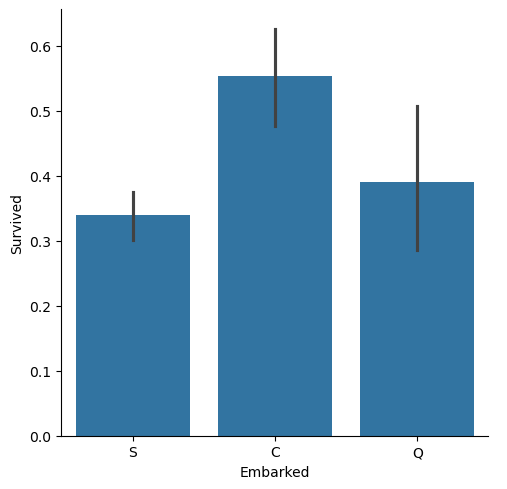

In [48]:
sns.catplot(x="Embarked", y="Survived", data=data, kind="bar")
plt.show()

Passenger coming from Cherbourg (C) have more chance to survive.

### Let's find the reason

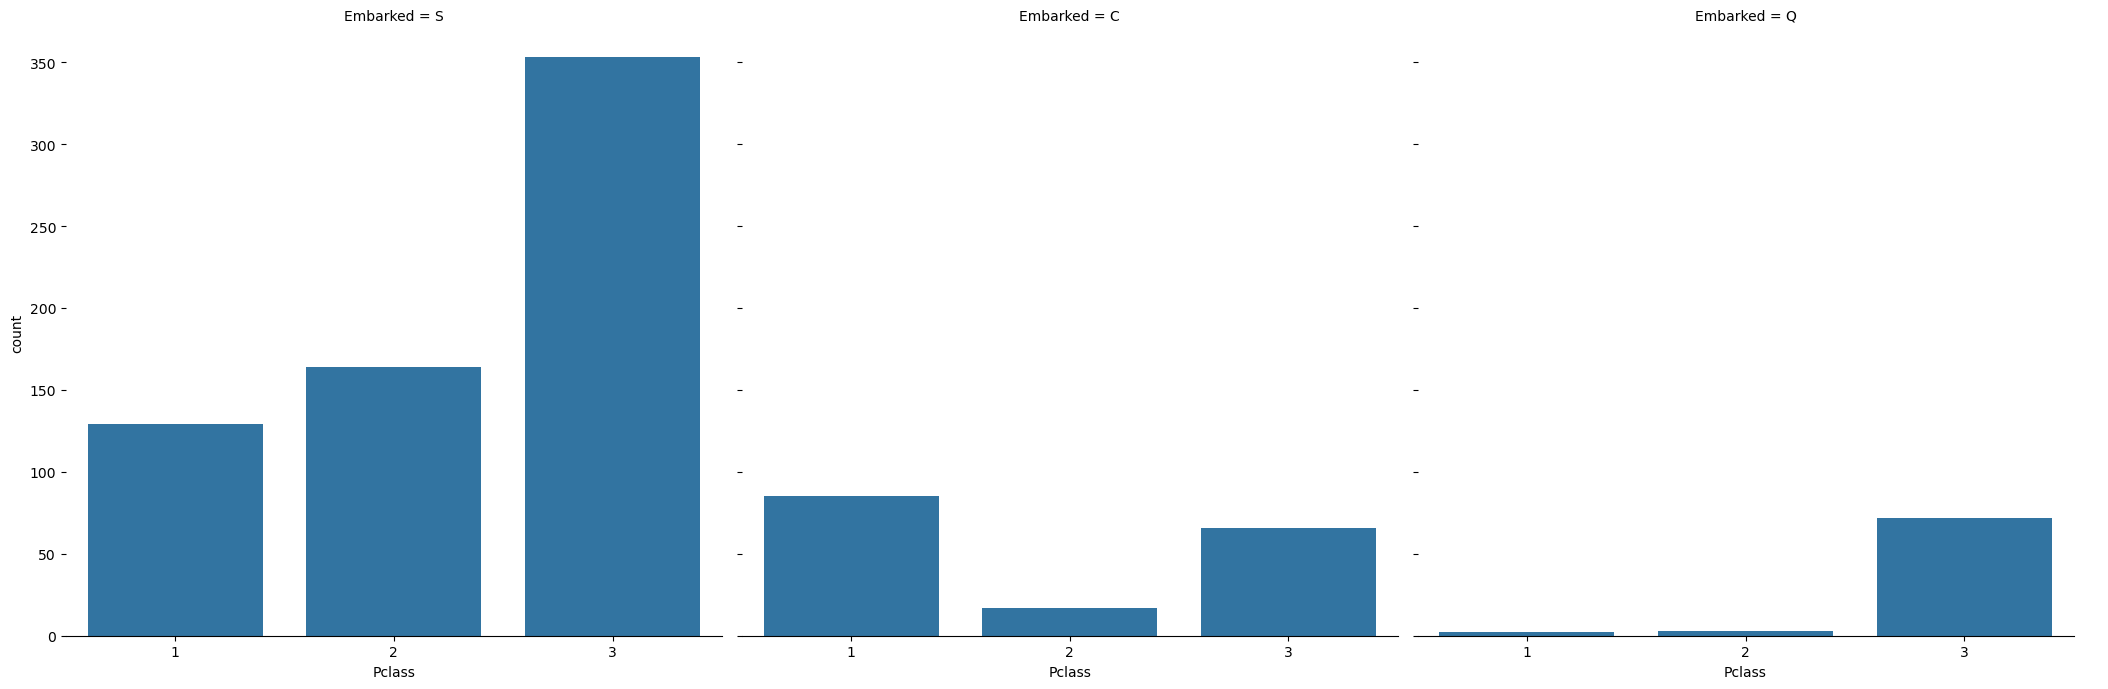

In [51]:
g = sns.catplot(x="Pclass", col="Embarked", data=data, kind="count", height=7)
g.despine(left=True)
plt.show()

In above graph first class passengers are more or less same, but Embarked = O has no 1st class passengers. Hence their chance of survival is lesser than Embarked = C

<Figure size 640x480 with 0 Axes>

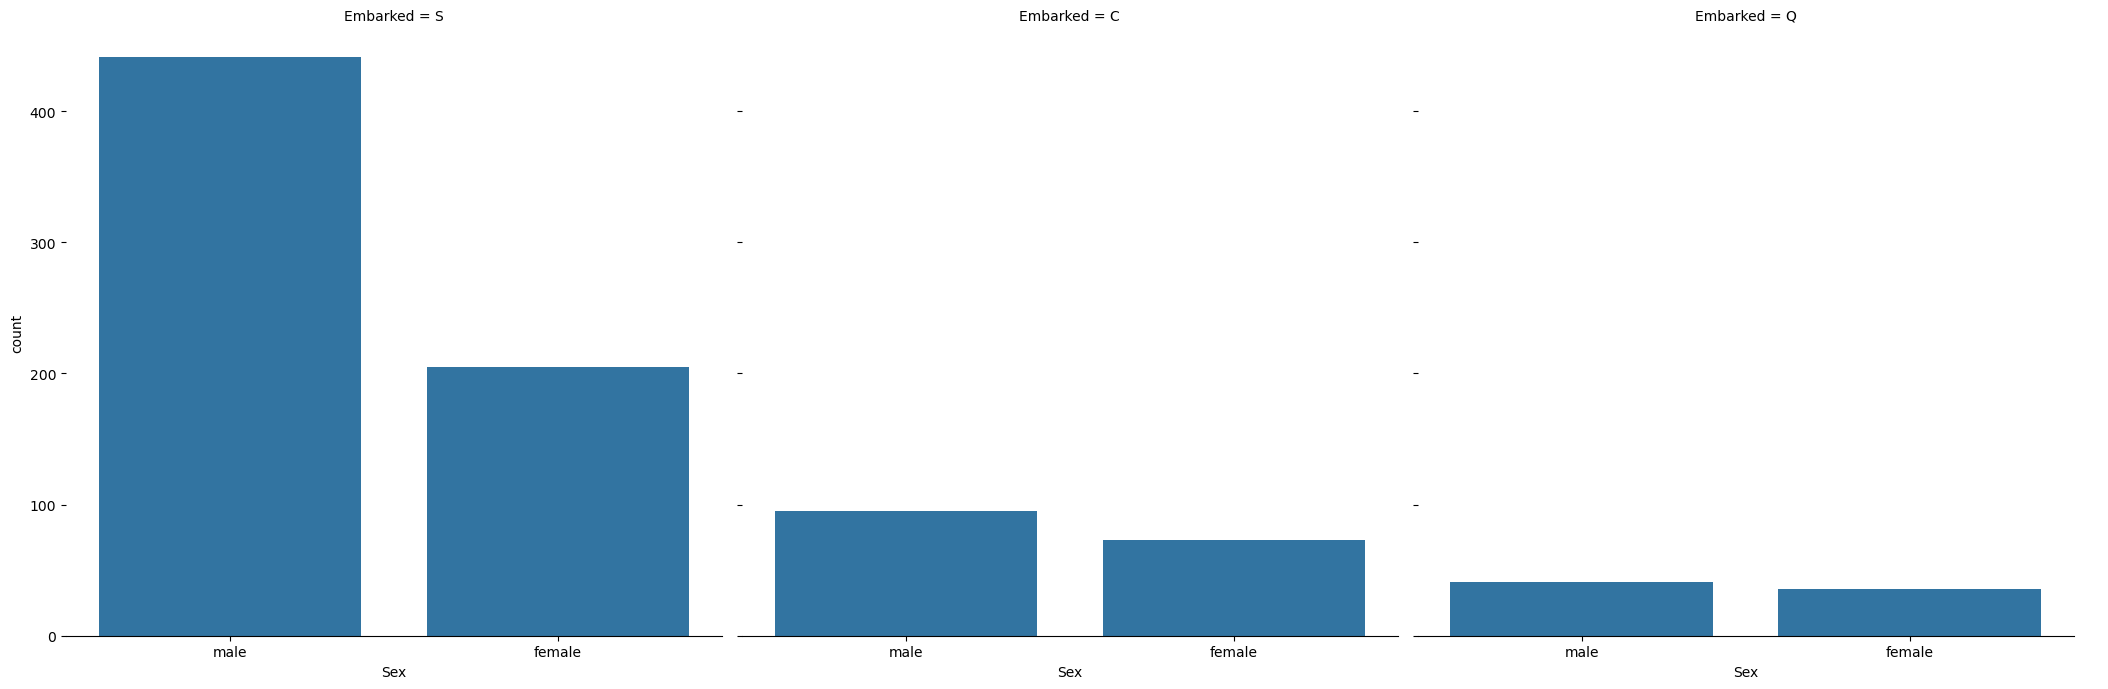

In [53]:
plt.figure()
g = sns.catplot(x="Sex", col="Embarked", data=data, kind="count", height=7)
g.despine(left=True)
plt.show()

In above graph first class Embarked = S have more no of males as compared to Embarked = C, hence Embarked = C has higher chance of survival

## Preparing data

In [57]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
mean = data['Age'].mean()
std = data['Age'].std()
is_null = data['Age'].isnull().sum()

In [60]:
print(mean, std, is_null)

29.69911764705882 14.526497332334044 177


In [62]:
rand_age = np.random.randint(mean-std, mean+std , size = is_null) # generating age between the 64% of the data .That is first std deviation.

In [68]:
type(rand_age)

numpy.ndarray

In [70]:
a = data['Age'].copy()
np.isnan(a) # Gives values of a if it is NaN ot not

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [72]:
a[np.isnan(a)] # Takes those values Which is true for NaN

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [74]:
a[np.isnan(a)] = rand_age # In the place of NaN values, rand_age generated is assigned.

In [76]:
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [78]:
# Assign the value back to the original Data.
data['Age'] = a
data['Age'].isna().sum()

0

In [80]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [84]:
data['Embarked'] = data['Embarked'].fillna('S')

In [86]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [88]:
col_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(col_to_drop, inplace = True, axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [90]:
ports = {'S' : 0, 'C' : 1, 'Q' : 2 }
data['Embarked'] = data['Embarked'].map(ports)

In [92]:
genders = {'male' : 0, 'female' : 1 }
data['Sex'] = data['Sex'].map(genders)

In [94]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Splitting the Data

In [109]:
x = data.drop(data.columns[0],axis = 1)
y = data['Survived']

In [113]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30 , random_state = 0)

## Feature Scaling

In [116]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## Classification

In [119]:
logreg = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators = 1000)
knn_classifier = KNeighborsClassifier(5)
svc_classifier = SVC()

In [121]:
logreg.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)

SVC()

In [125]:
logreg_ypred = logreg.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)

In [127]:
from sklearn.metrics import accuracy_score
logreg_acc = accuracy_score(ytest,logreg_ypred)
dt_classifier_acc = accuracy_score(ytest,dt_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest,rf_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest,knn_classifier_ypred)
svc_classifier_acc = accuracy_score(ytest,svc_classifier_ypred)

In [129]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  80.22
Support Vector      :  81.72
Decision Tree       :  77.99
K-NN Classifier     :  80.6
Random Forest       :  83.21
